### Intro to Seaborn Visualization -- Make Plots Look Pretty

In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
from adjustText import adjust_text
import seaborn as sns # Here is our new package call after conda install

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
### Again collecting just data analyst positions in the United States

df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

# Drop NaN values in salary column
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

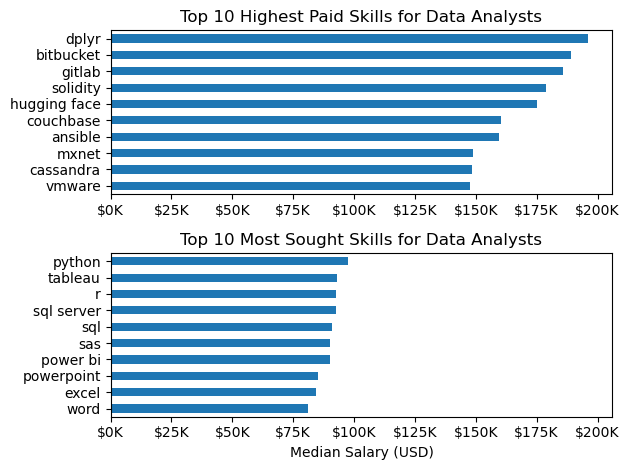

In [4]:
### This is the collection of code to create the bar charts from Section 19

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y= 'median', ax=ax[0], legend=False) # Changing axis here is the [::-1] call

    # Set up each graph independently
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y= 'median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most Sought Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)') # Makes a single label at bottom for both
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

plt.show()

### Going to copy and paste the cell above and then alter with Seaborn

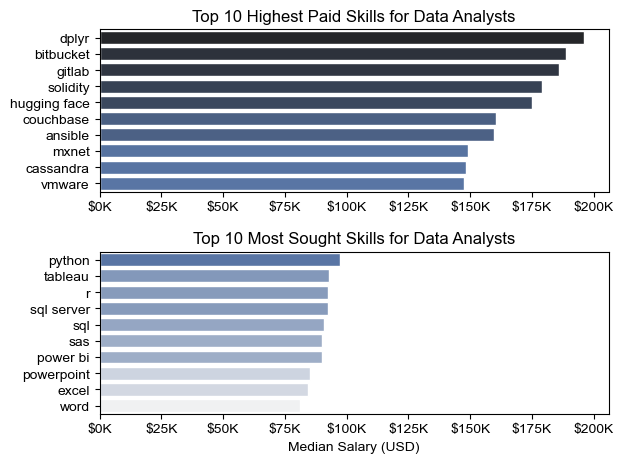

In [5]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks') # Alters the 'pop' of the graph - washes color out a bit

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')

#df_DA_top_pay[::-1].plot(kind='barh', y= 'median', ax=ax[0], legend=False) # Changing axis here is the [::-1] call

    # Set up each graph independently
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')

#df_DA_skills[::-1].plot(kind='barh', y= 'median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most Sought Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)') # Makes a single label at bottom for both
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

fig.tight_layout()

plt.show()

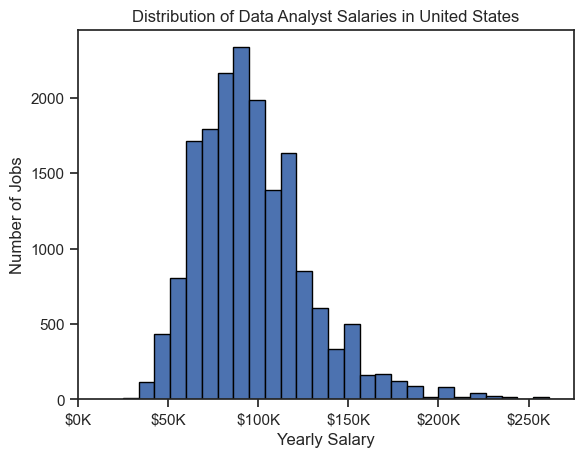

In [ ]:
### Histogram from Section 17

df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 275000)

# Format stuff with the stuff from 16
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst Salaries in United States')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

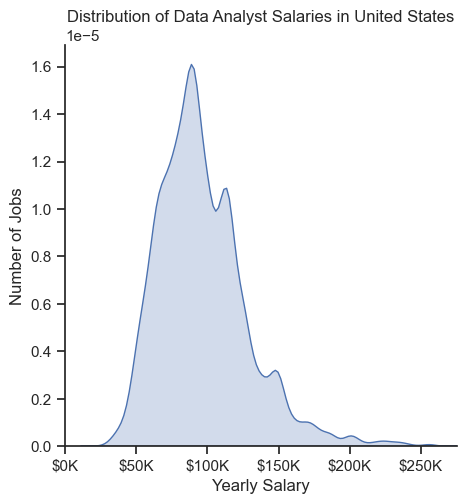

In [8]:
### Using Seaborn to create a smoothed distribution plot instead

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

#df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 275000)

# Format stuff with the stuff from 16
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst Salaries in United States')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

### Now for Boxplot

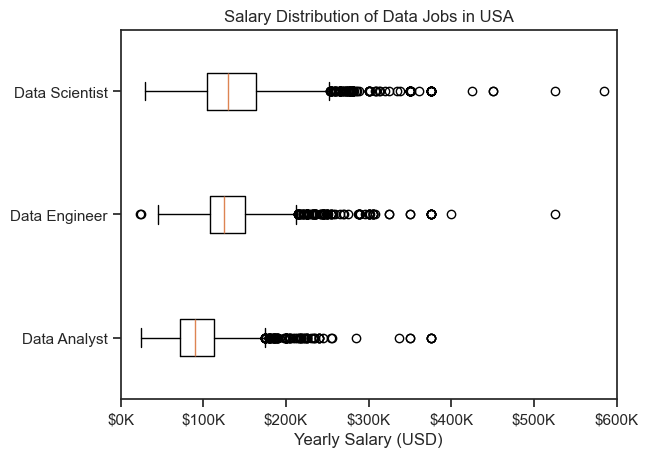

In [9]:
### From Section 18

 # Creating lists
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == "United States")].copy()

#df_US # Checking above

# Drop NaN values
df_US = df_US.dropna(subset=['salary_year_avg'])


# Now need to get job_list
job_list = [df_US[df_US['job_title_short'] == job] ['salary_year_avg'] for job in job_titles]

job_list[0]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution of Data Jobs in USA')
plt.xlabel('Yearly Salary (USD)')
ax = plt.gca() # In order to change x axis to actual data values rather than decimal scale
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))
plt.xlim(0, 600000)
plt.show()

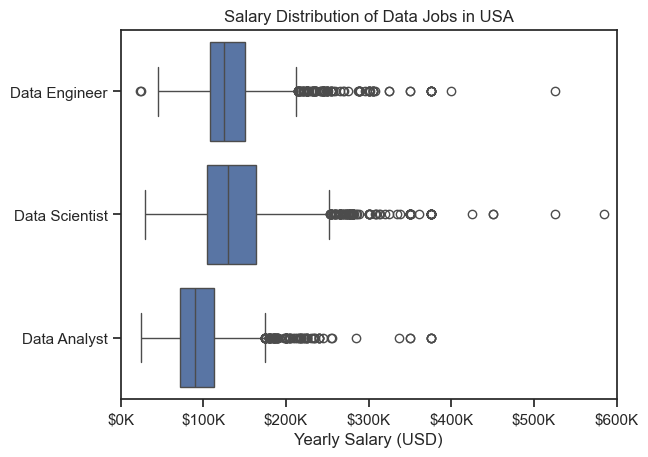

In [11]:
### With Seaborn


sns.boxplot(df_US, x='salary_year_avg', y='job_title_short')

#plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution of Data Jobs in USA')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ax = plt.gca() # In order to change x axis to actual data values rather than decimal scale
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))
plt.xlim(0, 600000)
plt.show()